<a href="https://colab.research.google.com/github/SenorFoca/PADM/blob/main/PA_CW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [ ]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/SenorFoca/PADM/refs/heads/main/data.csv')

# Display the first and last rows
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [ ]:
# Display the list of original column names
print(data.columns.tolist())

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth 

In [ ]:
# Remove leading spaces from column names
data.columns = data.columns.str.lstrip()
print(data.columns.tolist())

['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth R

In [ ]:
# Check data types and ensure variable consistency
print("\nData Types:")
data.dtypes


Data Types:


,0
Bankrupt?,int64
ROA(C) before interest and depreciation before interest,float64
ROA(A) before interest and % after tax,float64
ROA(B) before interest and depreciation after tax,float64
Operating Gross Margin,float64
...,...
Liability to Equity,float64
Degree of Financial Leverage (DFL),float64
Interest Coverage Ratio (Interest expense to EBIT),float64
Net Income Flag,int64


In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_cols = missing_values[missing_values != 0]

print("\nMissing Values:")
if missing_cols.empty:
    print("There are no missing values.")
else:
    print(missing_cols)


Missing Values:
There are no missing values.


In [ ]:
# Define the target variable name
target = 'Bankrupt?'

# Calculate the total number of each class
class_counts_number = data[target].value_counts()

print(f"No Bankrupt: {class_counts_number[0]} transactions")
print(f"Bankrupt: {class_counts_number[1]} transactions")

No Bankrupt: 6599 transactions
Bankrupt: 220 transactions


In [ ]:
# Calculate the percentage of each class
class_counts_percentage = data[target].value_counts(normalize=True) * 100

print(f"No Bankrupt: {class_counts_percentage[0]:.2f}% of the dataset")
print(f"Bankrupt: {class_counts_percentage[1]:.2f}% of the dataset")

No Bankrupt: 96.77% of the dataset
Bankrupt: 3.23% of the dataset


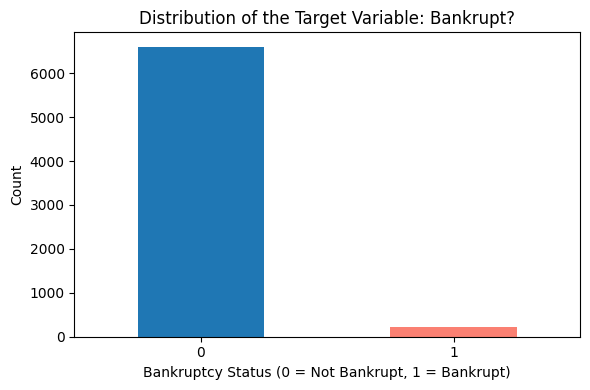

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
class_counts_number.plot(kind='bar', color=['tab:blue', 'salmon'])
plt.title('Distribution of the Target Variable: Bankrupt?')
plt.xlabel('Bankruptcy Status (0 = Not Bankrupt, 1 = Bankrupt)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Numeric columns: ['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Tot

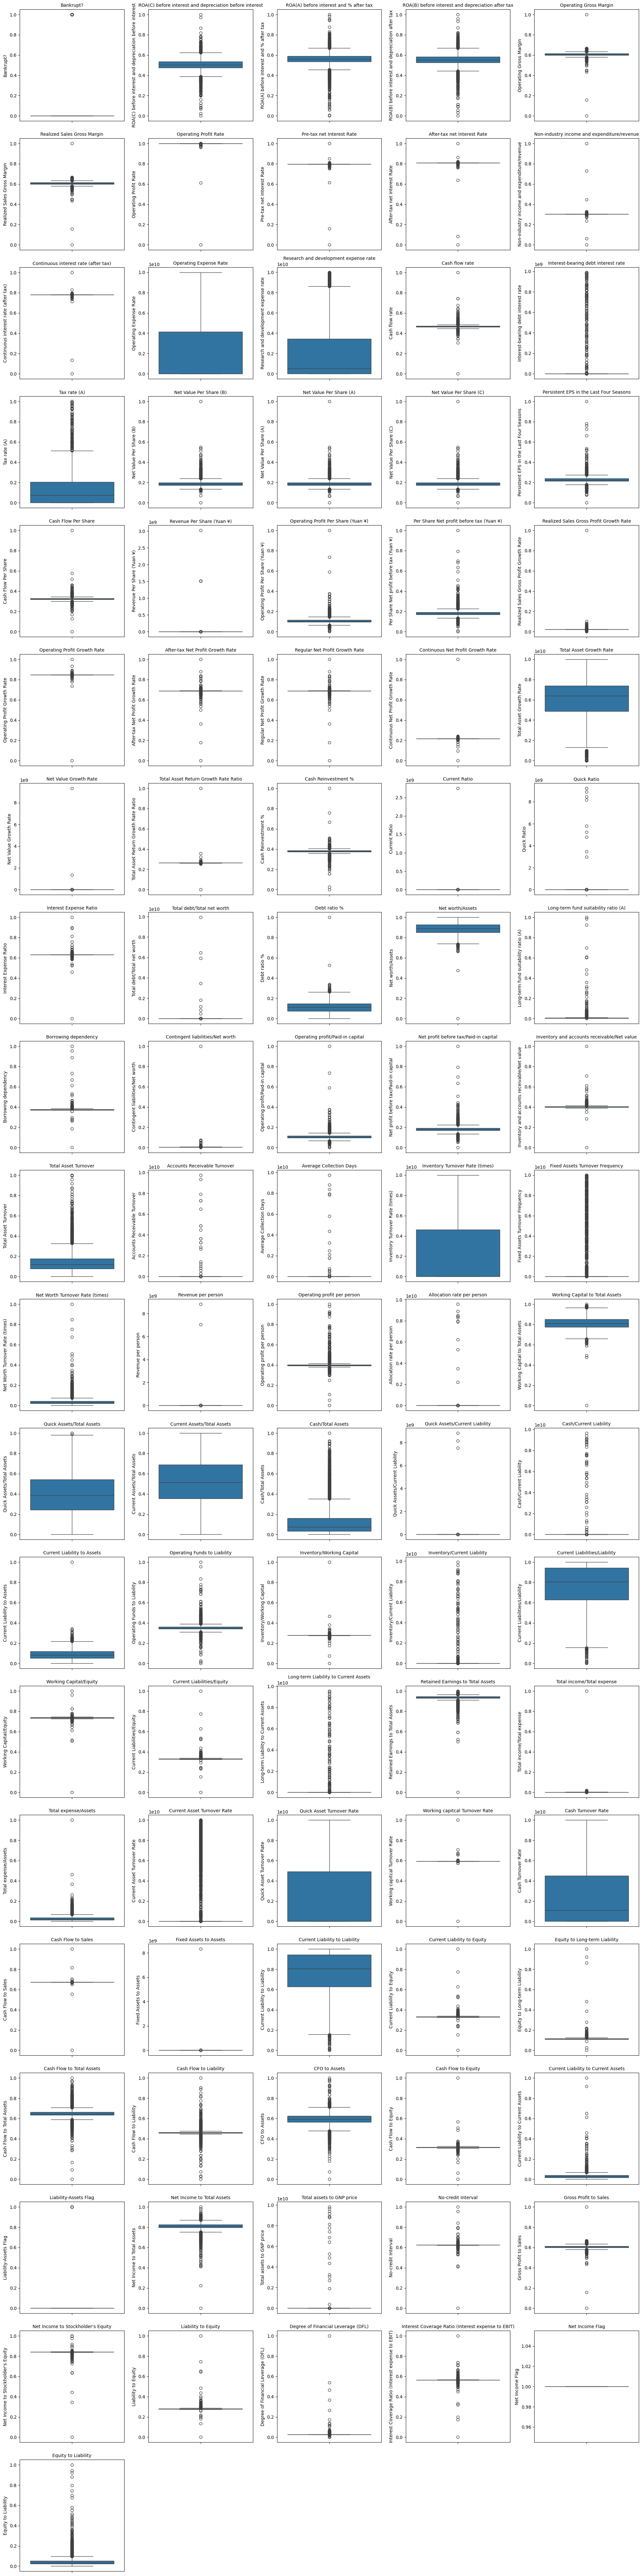

In [ ]:
# Select all numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

# Determine grid dimensions: 5 columns per row
cols_per_row = 5
n_rows = math.ceil(len(numeric_cols) / cols_per_row)

# Create box plots for each numeric column
plt.figure(figsize=(cols_per_row * 4, n_rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, cols_per_row, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.show()

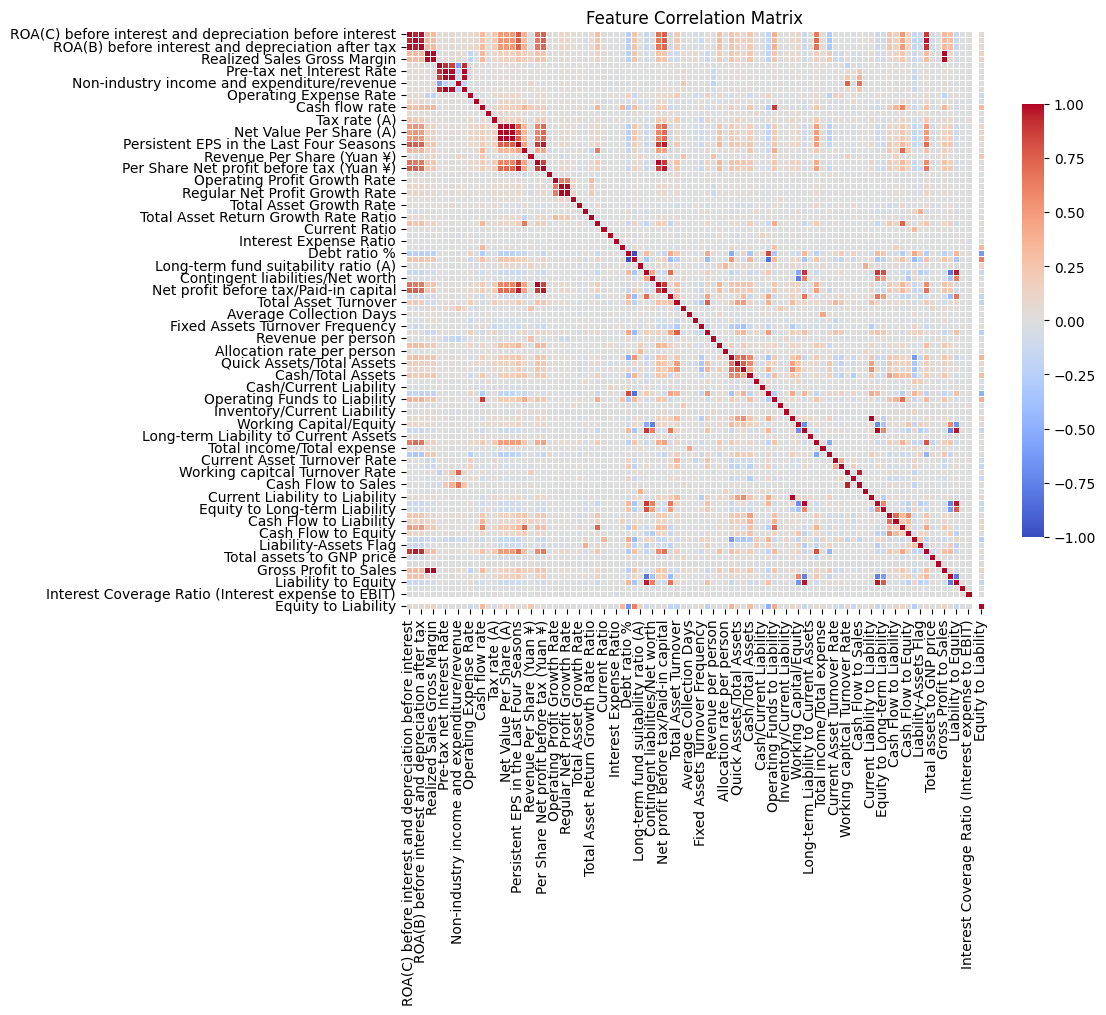

In [ ]:
# Compute and plot the correlation matrix for features
features = data.drop('Bankrupt?',axis=1).columns
corr_matrix = data[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# Identify highly correlated feature pairs
list1 = features
list2 = features
list_int = []
count = 1

for col1 in list1:
    list_int.append(col1)
    for col2 in list2:
        if col2 not in list_int:
            R_corr = data.corr().loc[col1,col2]
            if R_corr > 0.9 or R_corr < -0.9:
                print(count,'.  ',col1,' -- ',col2,';  R = {:.3f}'.format(R_corr))
                count += 1

1 .   ROA(C) before interest and depreciation before interest  --  ROA(A) before interest and % after tax ;  R = 0.940
2 .   ROA(C) before interest and depreciation before interest  --  ROA(B) before interest and depreciation after tax ;  R = 0.987
3 .   ROA(A) before interest and % after tax  --  ROA(B) before interest and depreciation after tax ;  R = 0.956
4 .   ROA(A) before interest and % after tax  --  Net Income to Total Assets ;  R = 0.962
5 .   ROA(B) before interest and depreciation after tax  --  Net Income to Total Assets ;  R = 0.912
6 .   Operating Gross Margin  --  Realized Sales Gross Margin ;  R = 1.000
7 .   Operating Gross Margin  --  Gross Profit to Sales ;  R = 1.000
8 .   Realized Sales Gross Margin  --  Gross Profit to Sales ;  R = 1.000
9 .   Operating Profit Rate  --  Pre-tax net Interest Rate ;  R = 0.916
10 .   Operating Profit Rate  --  Continuous interest rate (after tax) ;  R = 0.916
11 .   Pre-tax net Interest Rate  --  After-tax net Interest Rate ;  R = 

# Machine learning

In [ ]:
# Separate input features and target variable
X = data.drop(columns=[target])
y = data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply SMOTE to augment the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the class distribution after applying SMOTE
print("After applying SMOTE, counts of label '0': {}".format(sum(y_train_balanced == 0)))
print("After applying SMOTE, counts of label '1': {}".format(sum(y_train_balanced == 1)))

# Display the percentage distribution after SMOTE
class_percentage_balanced = y_train_balanced.value_counts(normalize=True) * 100

print(f"\nNo Bankrupt: {class_percentage_balanced[0]:.2f}% of the dataset")
print(f"Bankrupt: {class_percentage_balanced[1]:.2f}% of the dataset")

After applying SMOTE, counts of label '0': 5286
After applying SMOTE, counts of label '1': 5286

No Bankrupt: 50.00% of the dataset
Bankrupt: 50.00% of the dataset


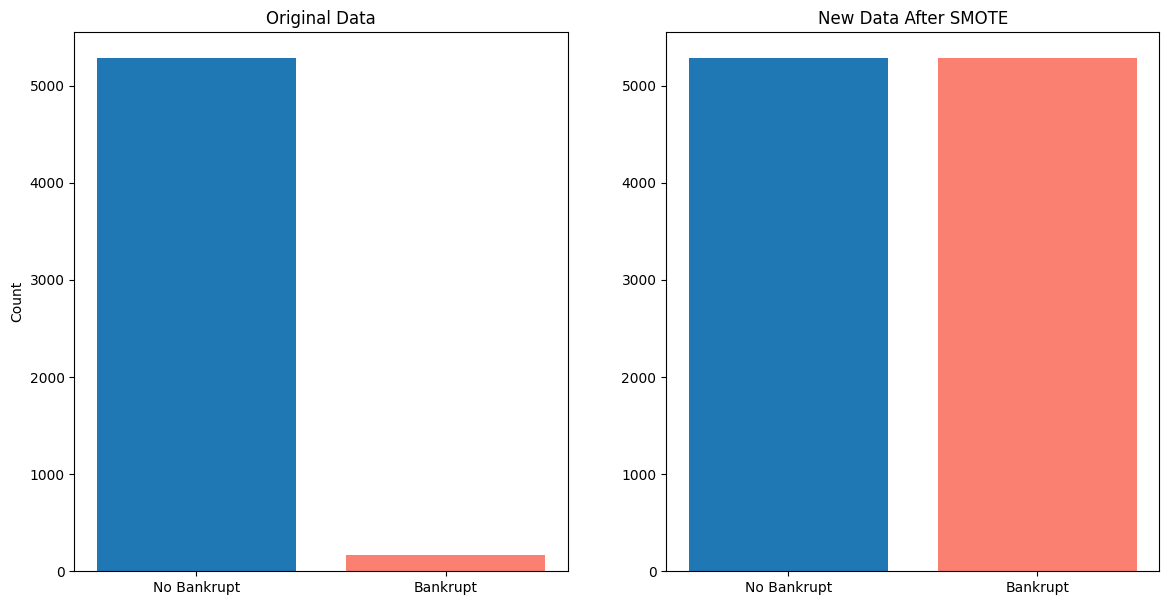

In [ ]:
# Plot original and SMOTE-adjusted class distributions
original_data = y_train.value_counts()
new_data = y_train_balanced.value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Original class distribution plot
ax[0].bar(original_data.index, original_data.values, color=['tab:blue', 'salmon'])
ax[0].set_title('Original Data')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Bankrupt', 'Bankrupt'])
ax[0].set_ylabel('Count')

# Class distribution after SMOTE plot
ax[1].bar(new_data.index, new_data.values, color=['tab:blue', 'salmon'])
ax[1].set_title('New Data After SMOTE')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Bankrupt', 'Bankrupt'])

plt.show()

## Lasso

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Set up a LogisticRegressionCV with L1 penalty (Lasso)
lasso_cv = LogisticRegressionCV(
    Cs=np.logspace(-3, 2, 6),   # regularization strength
    cv=3,                       # 3-fold cross-validation
    penalty='l1',               # Lasso regularization
    solver='saga',              # saga solver supports L1 penalty
    scoring='roc_auc',          # ROC AUC is good for imbalanced data
    max_iter=5000,
    random_state=42,
    verbose=1
)
lasso_cv.fit(X_train_scaled, y_train_balanced)

convergence after 563 epochs took 18 seconds
convergence after 2245 epochs took 59 seconds
convergence after 1823 epochs took 34 seconds
convergence after 3193 epochs took 61 seconds
convergence after 871 epochs took 17 seconds
convergence after 104 epochs took 2 seconds
convergence after 1373 epochs took 26 seconds
convergence after 1889 epochs took 37 seconds
convergence after 1826 epochs took 35 seconds
convergence after 2473 epochs took 54 seconds
convergence after 970 epochs took 23 seconds
convergence after 94 epochs took 2 seconds
convergence after 851 epochs took 16 seconds
convergence after 2517 epochs took 47 seconds
convergence after 2171 epochs took 41 seconds
convergence after 4934 epochs took 92 seconds
convergence after 976 epochs took 19 seconds
convergence after 109 epochs took 2 seconds


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                     cv=3, max_iter=5000, penalty='l1', random_state=42,
                     scoring='roc_auc', solver='saga', verbose=1)

In [ ]:
# Display the best regularization strength (C value)
best_C = lasso_cv.C_[0]
print(f"\nBest regularization strength (C): {best_C:.5f}")


Best regularization strength (C): 100.00000


In [ ]:
# Coefficients and variable importance
coef = lasso_cv.coef_[0]
feature_names = X.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef
})

In [ ]:
# Keep only non-zero coefficients (important variables)
lasso_vars = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', key=abs, ascending=False)
print("\nTop 20 Most Influential Features (Lasso):")
print(lasso_vars)


Top 20 Most Influential Features (Lasso):
                                              Feature  Coefficient
18            Persistent EPS in the Last Four Seasons    -2.864812
39                               Borrowing dependency     2.861479
43        Inventory and accounts receivable/Net value    -2.193782
85                         Net Income to Total Assets    -1.795096
41                   Operating profit/Paid-in capital     1.463016
..                                                ...          ...
28                            Total Asset Growth Rate    -0.010261
92  Interest Coverage Ratio (Interest expense to E...     0.004806
68                         Total income/Total expense     0.002782
27                  Continuous Net Profit Growth Rate    -0.000656
7                         After-tax net Interest Rate    -0.000428

[92 rows x 2 columns]


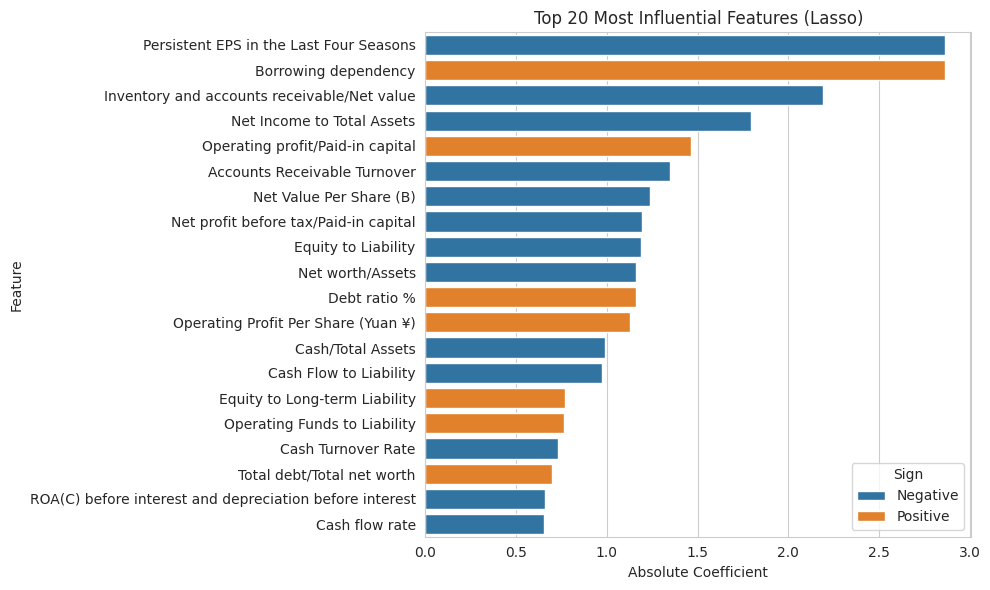

In [ ]:
# Make a copy of your DataFrame so we can modify it
df = lasso_vars.copy()

# Take only the top N features (already sorted or sort them first if needed)
top_n = 20
df = df.head(top_n)

# Create a column for absolute coefficients and for sign
df['AbsCoefficient'] = df['Coefficient'].abs()
df['Sign'] = np.where(df['Coefficient'] >= 0, 'Positive', 'Negative')

# Sort by absolute coefficient (descending) for a nicer presentation
df = df.sort_values('AbsCoefficient', ascending=False)

# Set a nice theme
sns.set_style('whitegrid')

# Plot
plt.figure(figsize=(10, 6))

# Barplot with absolute values on x-axis (all bars go to the right)
sns.barplot(
    data=df,
    x='AbsCoefficient',
    y='Feature',
    hue='Sign',     # color-code based on sign
    dodge=False     # place bars on top of each other (or set True to place side-by-side)
)

# Add labels and title
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Influential Features (Lasso)')

# Adjust layout
plt.tight_layout()
plt.show()

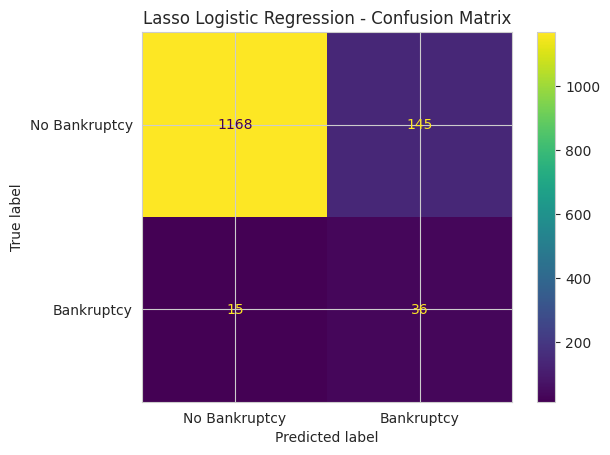

In [ ]:
# Evaluate Lasso on the test set
y_pred = lasso_cv.predict(X_test_scaled)
y_proba = lasso_cv.predict_proba(X_test_scaled)[:, 1]

# Display confusion matrix for Lasso
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["No Bankruptcy", "Bankruptcy"]).plot()
plt.title("Lasso Logistic Regression - Confusion Matrix")
plt.show()

In [ ]:
# Classification report for Lasso
print("\nClassification Report (Lasso):")
print(classification_report(y_test, y_pred))


Classification Report (Lasso):
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.20      0.71      0.31        51

    accuracy                           0.88      1364
   macro avg       0.59      0.80      0.62      1364
weighted avg       0.96      0.88      0.91      1364



In [ ]:
# AUC score for Lasso
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.4f}")

ROC AUC Score: 0.9077


## Ridge

In [ ]:
# Ridge Logistic Regression with with L2 penalty
ridge_cv = LogisticRegressionCV(
    Cs= np.logspace(-3, 2, 6),
    cv=5,
    penalty='l2',           # Ridge regularization
    solver='lbfgs',         # 'lbfgs' supports L2 penalty
    scoring='roc_auc',
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

ridge_cv.fit(X_train_scaled, y_train_balanced)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.0s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                     cv=5, max_iter=10000, n_jobs=-1, random_state=42,
                     scoring='roc_auc', verbose=1)

In [ ]:
# Display best C value for Ridge
best_C_ridge = ridge_cv.C_[0]
print(f"\nBest regularization strength (C) for Ridge: {best_C_ridge:.5f}")


Best regularization strength (C) for Ridge: 100.00000


In [ ]:
# Retrieve Ridge coefficients and prepare a DataFrame
ridge_coef = ridge_cv.coef_[0]
feature_names = X.columns

ridge_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coef,
    'Abs_Coefficient': np.abs(ridge_coef)
})
ridge_importance = ridge_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display top 20 most influential variables
print("\nTop 20 Most Influential Features (Ridge):")
print(ridge_importance[['Feature', 'Coefficient']].head(20))


Top 20 Most Influential Features (Ridge):
                                              Feature  Coefficient
15                            Net Value Per Share (B)   -10.087846
17                            Net Value Per Share (C)     7.680423
90                                Liability to Equity    -6.804281
39                               Borrowing dependency     6.321795
45                       Accounts Receivable Turnover    -6.213496
6                           Pre-tax net Interest Rate     4.580370
41                   Operating profit/Paid-in capital     4.433793
5                               Operating Profit Rate     3.899733
18            Persistent EPS in the Last Four Seasons    -3.770839
89                 Net Income to Stockholder's Equity     3.109814
9                Continuous interest rate (after tax)    -2.916069
7                         After-tax net Interest Rate    -2.819236
65                         Current Liabilities/Equity     2.799224
77                 

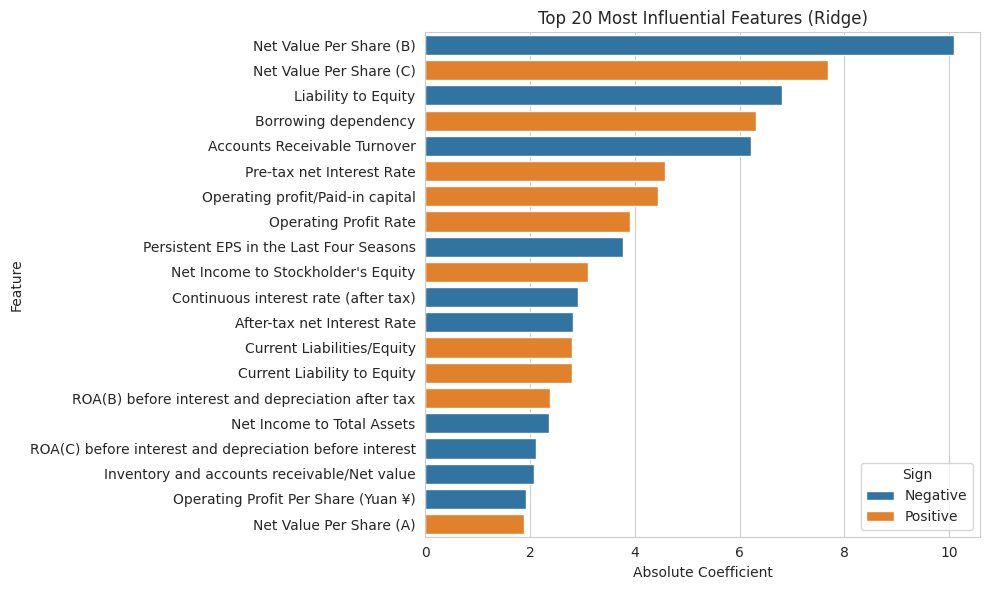

In [ ]:
# For visualization, select the top N influential features from Ridge
df_r = ridge_importance.copy()
df_r = df_r.head(top_n)
df_r['AbsCoefficient'] = df_r['Coefficient'].abs()
df_r['Sign'] = np.where(df_r['Coefficient'] >= 0, 'Positive', 'Negative')
df_r = df_r.sort_values('AbsCoefficient', ascending=False)

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_r,
    x='AbsCoefficient',
    y='Feature',
    hue='Sign',
    dodge=False
)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title(f"Top {top_n} Most Influential Features (Ridge)")
plt.tight_layout()
plt.show()

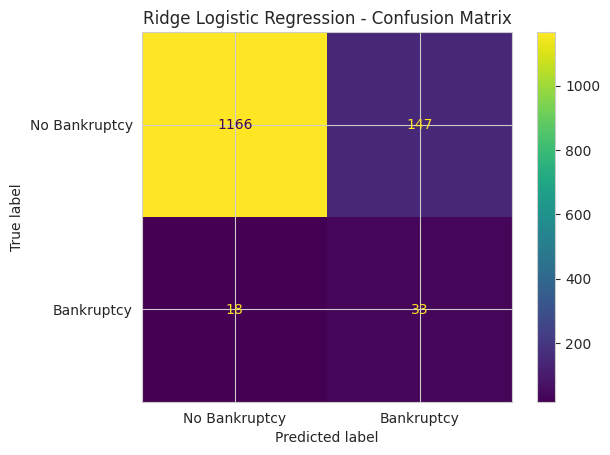

In [ ]:
# Evaluate Ridge on the test set
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_proba_ridge = ridge_cv.predict_proba(X_test_scaled)[:, 1]

# Display confusion matrix for Ridge
cm_ridge = confusion_matrix(y_test, y_pred_ridge)
ConfusionMatrixDisplay(cm_ridge, display_labels=["No Bankruptcy", "Bankruptcy"]).plot()
plt.title("Ridge Logistic Regression - Confusion Matrix")
plt.show()



In [ ]:
# Classification report for Ridge
print("\nClassification Report (Ridge):")
print(classification_report(y_test, y_pred_ridge))


Classification Report (Ridge):
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1313
           1       0.18      0.65      0.29        51

    accuracy                           0.88      1364
   macro avg       0.58      0.77      0.61      1364
weighted avg       0.95      0.88      0.91      1364



In [ ]:
# AUC Score for Ridge
auc_ridge = roc_auc_score(y_test, y_proba_ridge)
print(f"ROC AUC Score (Ridge): {auc_ridge:.4f}")


ROC AUC Score (Ridge): 0.8803


## Elastic Net

In [ ]:
# Elastic Net with cross-validation
elastic_cv = LogisticRegressionCV(
    Cs=10,                      # 10 values of C to try
    cv=5,                       # 5-fold cross-validation
    penalty='elasticnet',       # Elastic Net regularization
    solver='saga',              # saga supports elasticnet
    l1_ratios=[0.5],            # mix of L1 and L2
    scoring='roc_auc',
    max_iter=5000,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

elastic_cv.fit(X_train_scaled, y_train_balanced)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 115 epochs took 5 seconds
convergence after 115 epochs took 6 seconds
convergence after 493 epochs took 21 seconds
convergence after 501 epochs took 22 seconds
convergence after 1429 epochs took 64 seconds
convergence after 1518 epochs took 69 seconds
convergence after 2980 epochs took 135 seconds
convergence after 3507 epochs took 159 seconds
convergence after 1815 epochs took 82 seconds
convergence after 462 epochs took 21 seconds
convergence after 71 epochs took 3 seconds
convergence after 8 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 116 epochs took 6 seconds
convergence after 508 epochs took 22 seconds
convergence after 2651 epochs took 121 seconds
convergence after 483 epochs took 23 seconds
convergence after 68 epochs took 2 seconds
convergence after 9 epochs took 1 seconds
convergence after 2 epochs

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.2min finished


LogisticRegressionCV(cv=5, l1_ratios=[0.5], max_iter=5000, n_jobs=-1,
                     penalty='elasticnet', random_state=42, scoring='roc_auc',
                     solver='saga', verbose=1)

In [ ]:
# Best C and l1_ratio
best_C_elastic = elastic_cv.C_[0]
best_l1_ratio = elastic_cv.l1_ratio_[0]
print(f"\nBest C: {best_C_elastic:.5f}")
print(f"Best L1 ratio: {best_l1_ratio:.2f}")


Best C: 1291.54967
Best L1 ratio: 0.50


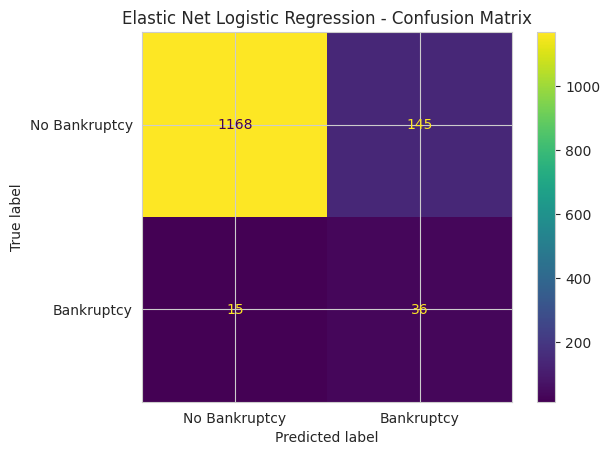

In [ ]:
# Evaluate Elastic Net on the test set
y_pred_elastic = elastic_cv.predict(X_test_scaled)
y_proba_elastic = elastic_cv.predict_proba(X_test_scaled)[:, 1]

# Display confusion matrix for Elastic Net
cm_elastic = confusion_matrix(y_test, y_pred_elastic)
ConfusionMatrixDisplay(cm_elastic, display_labels=["No Bankruptcy", "Bankruptcy"]).plot()
plt.title("Elastic Net Logistic Regression - Confusion Matrix")
plt.show()


In [ ]:
# Classification report for Elastic Net
print("\nClassification Report (Elastic Net):")
print(classification_report(y_test, y_pred_elastic))


Classification Report (Elastic Net):
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.20      0.71      0.31        51

    accuracy                           0.88      1364
   macro avg       0.59      0.80      0.62      1364
weighted avg       0.96      0.88      0.91      1364



In [ ]:
# ROC AUC Score for Elastic Net
auc_elastic = roc_auc_score(y_test, y_proba_elastic)
print(f"ROC AUC Score (Elastic Net): {auc_elastic:.4f}")


ROC AUC Score (Elastic Net): 0.9076


In [ ]:
# Extract coefficients
elastic_coef = elastic_cv.coef_[0]
feature_names = X.columns

# Create DataFrame
elastic_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': elastic_coef
})

# Filter non-zero coefficients
important_elastic = elastic_coef_df[elastic_coef_df['Coefficient'] != 0]
important_elastic = important_elastic.sort_values(by='Coefficient', key=abs, ascending=False)

print("\nTop 20 Most Influential Features (Elastic Net):")
print(important_elastic)


Top 20 Most Influential Features (Elastic Net):
                                              Feature  Coefficient
39                               Borrowing dependency     2.865759
18            Persistent EPS in the Last Four Seasons    -2.627564
43        Inventory and accounts receivable/Net value    -2.199665
85                         Net Income to Total Assets    -1.700805
41                   Operating profit/Paid-in capital     1.467862
..                                                ...          ...
68                         Total income/Total expense    -0.004106
27                  Continuous Net Profit Growth Rate    -0.002000
2   ROA(B) before interest and depreciation after tax    -0.001612
29                              Net Value Growth Rate     0.000106
32                                      Current Ratio     0.000105

[94 rows x 2 columns]


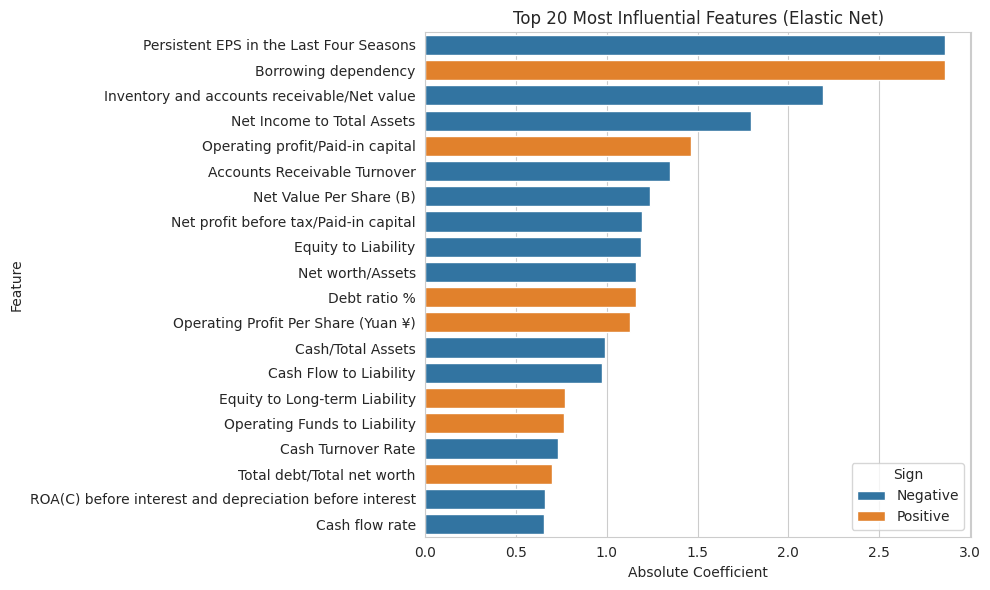

In [ ]:
# For visualization, select the top N influential features from Elastic Net
df_e = important_elastic.copy()
df_e = df_e.head(top_n)
df_e['AbsCoefficient'] = df_e['Coefficient'].abs()
df_e['Sign'] = np.where(df_e['Coefficient'] >= 0, 'Positive', 'Negative')
df_e = df_e.sort_values('AbsCoefficient', ascending=False)

sns.set_style('whitegrid')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_e,
    x='AbsCoefficient',
    y='Feature',
    hue='Sign',   # color‐code positive vs. negative
    dodge=False   # place bars in a single column
)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Most Influential Features (Elastic Net)')
plt.tight_layout()
plt.show()

# Comparision

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Define a helper function to evaluate model performance using several metrics
def evaluate_model(name, y_true, y_pred, y_proba, coef):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'AUC Score': roc_auc_score(y_true, y_proba),
    }

results = []

In [ ]:
# Evaluate each model (Lasso, Ridge, Elastic Net)
results.append(evaluate_model('Lasso', y_test, y_pred, y_proba, lasso_cv.coef_[0]))
results.append(evaluate_model('Ridge', y_test, y_pred_ridge, y_proba_ridge, ridge_cv.coef_[0]))
results.append(evaluate_model('Elastic Net', y_test, y_pred_elastic, y_proba_elastic, elastic_cv.coef_[0]))

comparison_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
display(comparison_df)


📊 Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Lasso,0.882698,0.198895,0.705882,0.310345,0.907665
1,Ridge,0.879032,0.183333,0.647059,0.285714,0.880277
2,Elastic Net,0.882698,0.198895,0.705882,0.310345,0.907621


<ipython-input-45-10bb46804060>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


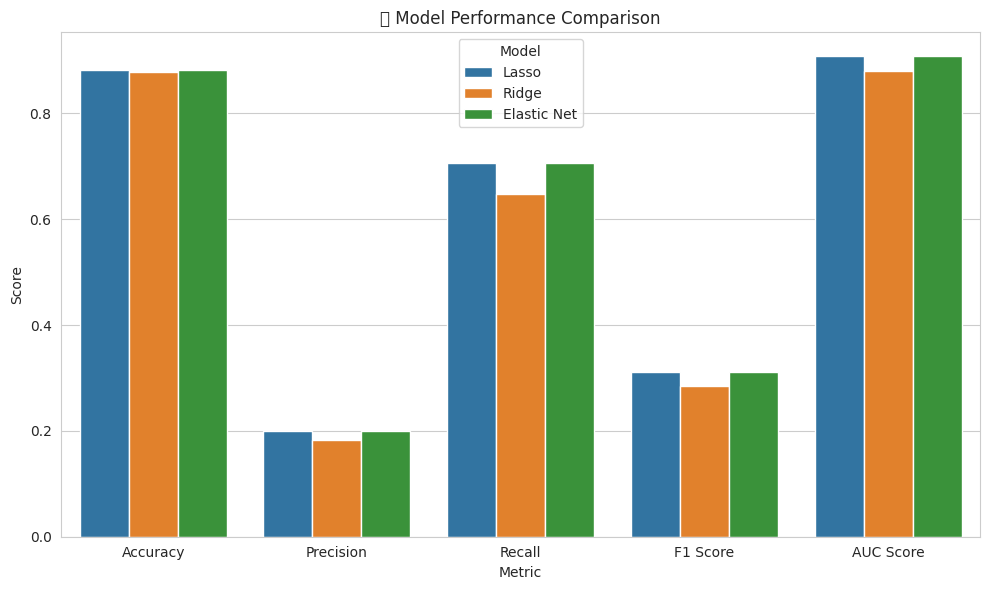

In [ ]:
# Prepare data for plotting the performance metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score']
comparison_melted = comparison_df.melt(id_vars='Model', value_vars=metrics_to_plot)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_melted, x='variable', y='value', hue='Model')
plt.title("📊 Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.tight_layout()
plt.show()

In [ ]:
# Define groups of features
profitability_vars = [
    'ROA(C) before interest and depreciation before interest',
    'ROA(A) before interest and % after tax',
    'ROA(B) before interest and depreciation after tax',
    'Operating Gross Margin',
    'Realized Sales Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'After-tax net Interest Rate',
    'Operating profit/Paid-in capital',
    'Net profit before tax/Paid-in capital',
    'Net Income to Total Assets',
    'Gross Profit to Sales',
]

growth_vars = [
    'Realized Sales Gross Profit Growth Rate',
    'Operating Profit Growth Rate',
    'After-tax Net Profit Growth Rate',
    'Regular Net Profit Growth Rate',
    'Continuous Net Profit Growth Rate',
    'Total Asset Growth Rate',
    'Net Value Growth Rate',
    'Total Asset Return Growth Rate Ratio',
    'Persistent EPS in the Last Four Seasons'
]

liquidity_vars = [
    'Current Ratio',
    'Quick Ratio',
    'Working Capital to Total Assets',
    'Quick Assets/Total Assets',
    'Current Assets/Total Assets',
    'Cash/Total Assets',
    'Quick Assets/Current Liability',
    'Cash/Current Liability',
    'Working Capital/Equity',
    'Inventory/Working Capital',
    'Inventory/Current Liability'
]

solvency_vars = [
    'Total debt/Total net worth',
    'Debt ratio %',
    'Net worth/Assets',
    'Long-term fund suitability ratio (A)',
    'Borrowing dependency',
    'Contingent liabilities/Net worth',
    'Current Liabilities/Liability',
    'Current Liabilities/Equity',
    'Liability to Equity',
    'Equity to Liability',
    'Equity to Long-term Liability',
    'Long-term Liability to Current Assets',
    'Degree of Financial Leverage (DFL)',
    'Interest Coverage Ratio (Interest expense to EBIT)',
    'Interest Expense Ratio',
    'Liability-Assets Flag',
    'Current Liability to Assets',
    'Operating Funds to Liability',
    'Current Liability to Current Assets',
    'Current Liability to Liability'
]

efficiency_vars = [
    'Total Asset Turnover',
    'Accounts Receivable Turnover',
    'Average Collection Days',
    'Inventory Turnover Rate (times)',
    'Fixed Assets Turnover Frequency',
    'Net Worth Turnover Rate (times)',
    'Current Asset Turnover Rate',
    'Quick Asset Turnover Rate',
    'Working capitcal Turnover Rate',
    'Cash Turnover Rate',
    'Cash Flow to Sales'
]

market_vars = [
    'Net Value Per Share (B)',
    'Net Value Per Share (A)',
    'Net Value Per Share (C)',
    'Revenue Per Share (Yuan ¥)',
    'Operating Profit Per Share (Yuan ¥)',
    'Per Share Net profit before tax (Yuan ¥)',
    'Retained Earnings to Total Assets',
]

# Group the variables into a dictionary for analysis
groups = {
    'Profitability': profitability_vars,
    'Growth': growth_vars,
    'Liquidity': liquidity_vars,
    'Solvency': solvency_vars,
    'Efficiency': efficiency_vars,
    'Market Valuation': market_vars
}


In [ ]:
# Define a function to compute the overall importance of each feature group
def compute_group_importance(coef_array, feature_names, group_dict):
    coef_series = pd.Series(coef_array, index=feature_names)

    group_scores = {}

    for group_name, variables in group_dict.items():
        group_coefs = coef_series[coef_series.index.isin(variables)]
        group_scores[group_name] = group_coefs.abs().sum()

    return pd.Series(group_scores).sort_values(ascending=False)

In [ ]:
# Compute group importance for each model
groups_importance_lasso = compute_group_importance(lasso_cv.coef_[0], X.columns, groups)
groups_importance_ridge = compute_group_importance(ridge_cv.coef_[0], X.columns, groups)
groups_importance_elastic = compute_group_importance(elastic_cv.coef_[0], X.columns, groups)

In [ ]:
# Combine group importance into a single DataFrame for comparison
group_importance_df = pd.DataFrame({
    'Lasso': groups_importance_lasso,
    'Ridge': groups_importance_ridge,
    'Elastic Net': groups_importance_elastic
}).reset_index().rename(columns={'index': 'Group'})

group_importance_melted = group_importance_df.melt(id_vars='Group', var_name='Model', value_name='Importance')

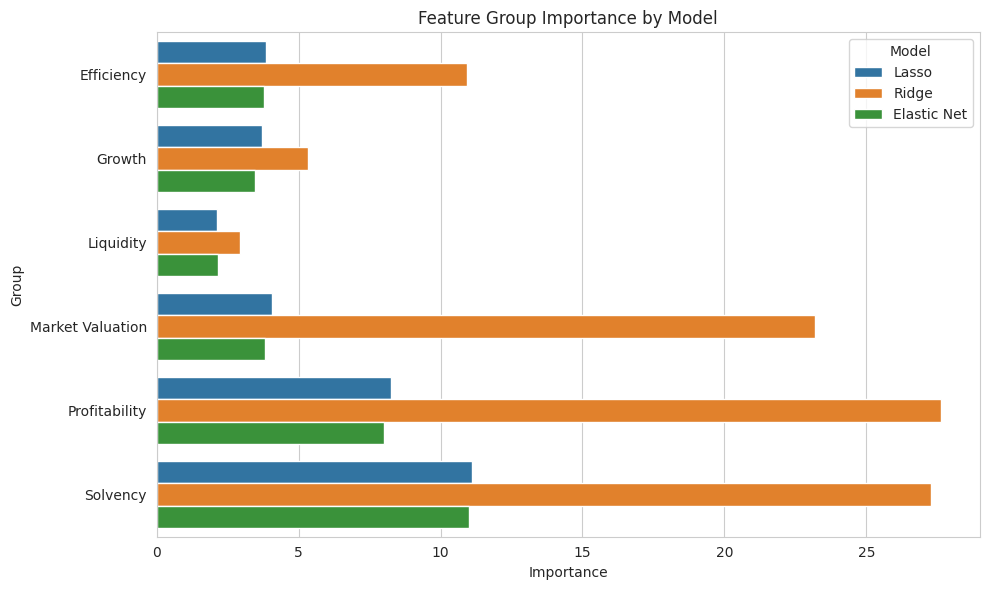

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=group_importance_melted, x='Importance', y='Group', hue='Model')
plt.title("Feature Group Importance by Model")
plt.tight_layout()
plt.show()